In [ ]:
!pip list

In [26]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [27]:
data = pd.read_csv(r"C:\Users\Mmoiz\Downloads\data science\temperature_change_data_11-29-2021.csv")
data

,Domain Code,Domain,Area Code (ISO3),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1961,1961,°C,-0.751,Fc,Calculated data
1,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1962,1962,°C,0.985,Fc,Calculated data
2,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1963,1963,°C,1.931,Fc,Calculated data
3,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1964,1964,°C,-2.056,Fc,Calculated data
4,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1965,1965,°C,-0.669,Fc,Calculated data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67620,ET,Temperature change,ZWE,Zimbabwe,7271,Temperature change,7020,Meteorological year,2016,2016,°C,1.470,Fc,Calculated data
67621,ET,Temperature change,ZWE,Zimbabwe,7271,Temperature change,7020,Meteorological year,2017,2017,°C,0.443,Fc,Calculated data
67622,ET,Temperature change,ZWE,Zimbabwe,7271,Temperature change,7020,Meteorological year,2018,2018,°C,0.747,Fc,Calculated data
67623,ET,Temperature change,ZWE,Zimbabwe,7271,Temperature change,7020,Meteorological year,2019,2019,°C,1.359,Fc,Calculated data


In [ ]:
data.loc['Pakistan']

In [ ]:
data.loc[Area == 'Pakistan']

In [ ]:
data.set_index('Area', inplace = True)

In [ ]:
data

In [ ]:
data.loc['Pakistan']

In [28]:
FilterData = data[(data["Flag Description"] != "Data not available") &
                   (data["Months"] == "Meteorological year")]
FilterData

,Domain Code,Domain,Area Code (ISO3),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
240,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7020,Meteorological year,1961,1961,°C,-0.121,Fc,Calculated data
241,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7020,Meteorological year,1962,1962,°C,-0.171,Fc,Calculated data
242,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7020,Meteorological year,1963,1963,°C,0.841,Fc,Calculated data
243,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7020,Meteorological year,1964,1964,°C,-0.779,Fc,Calculated data
244,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7020,Meteorological year,1965,1965,°C,-0.254,Fc,Calculated data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67620,ET,Temperature change,ZWE,Zimbabwe,7271,Temperature change,7020,Meteorological year,2016,2016,°C,1.470,Fc,Calculated data
67621,ET,Temperature change,ZWE,Zimbabwe,7271,Temperature change,7020,Meteorological year,2017,2017,°C,0.443,Fc,Calculated data
67622,ET,Temperature change,ZWE,Zimbabwe,7271,Temperature change,7020,Meteorological year,2018,2018,°C,0.747,Fc,Calculated data
67623,ET,Temperature change,ZWE,Zimbabwe,7271,Temperature change,7020,Meteorological year,2019,2019,°C,1.359,Fc,Calculated data


In [29]:
MeanData = FilterData.groupby(["Area","Year"])["Value"].mean().reset_index()
MeanData

,Area,Year,Value
0,Afghanistan,1961,-0.121
1,Afghanistan,1962,-0.171
2,Afghanistan,1963,0.841
3,Afghanistan,1964,-0.779
4,Afghanistan,1965,-0.254
...,...,...,...
13039,Zimbabwe,2016,1.470
13040,Zimbabwe,2017,0.443
13041,Zimbabwe,2018,0.747
13042,Zimbabwe,2019,1.359


In [ ]:
fig = px.choropleth(MeanData, locations='Area', color='Value', hover_name='Area',
                    projection='natural earth', animation_frame='Year',
                    title='Temperatue change data')
fig.show()

In [22]:
country = MeanData.Area.unique()

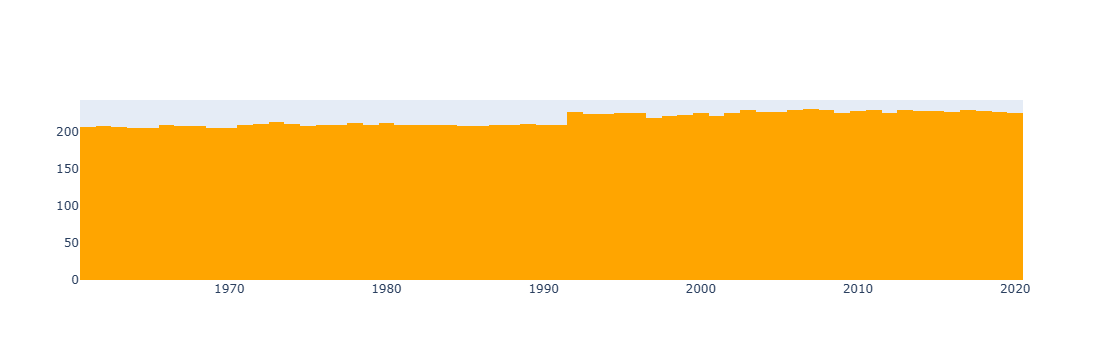

In [38]:
fig = go.Figure()
fig.add_trace(
    go.Histogram(x = MeanData.Year,
                #xbins=go.histogram.XBins(size=1),  Change the bin size
                marker=go.histogram.Marker(color="orange"), # Change the color
            )
)
fig.show()

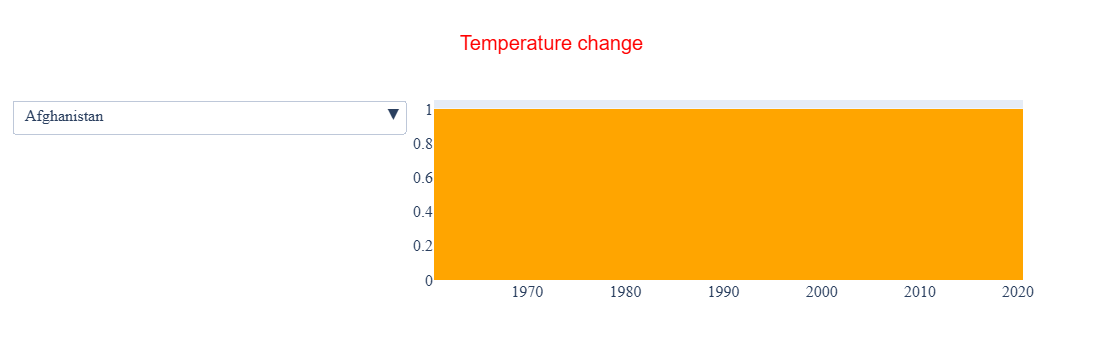

In [49]:
fig = go.Figure()
fig.add_trace(
    go.Histogram(x = MeanData.Year,
                xbins=go.histogram.XBins(size=1),  # Change the bin size
                marker=go.histogram.Marker(color="orange"), # Change the color
            )
)
# fig.show()

buttons = []
# button with one option for each 'special'
for s in MeanData.Area.unique():
    buttons.append(dict(method='restyle',
                        label=s,
                        visible=True,
                        args=[{'y':[MeanData[MeanData['Area']==s]['Value'].values],
                               'x':[MeanData[MeanData['Area']==s]['Year'].values],
                               'type':'histogram'}, ],
                        )
                  )

# add first option for all 'special'
buttons.insert(0, dict(method='restyle',
                 label='all',
                 visible=True,
                 args=[{'y':[MeanData['Value'].values],
                        'x':[MeanData['Year'].values],
                        'type':'histogram'}, ],))

# some adjustments to the updatemenus
updatemenu = []
your_menu = dict()
updatemenu.append(your_menu)

updatemenu[0]['buttons'] = buttons
updatemenu[0]['direction'] = 'down'
updatemenu[0]['showactive'] = True

# add dropdown menus to the figure
#fig.update_layout(showlegend=False, updatemenus=updatemenu)
fig.update_layout(showlegend=False, updatemenus=updatemenu,
    # Set the global font
    font = {
        "family":"Times new Roman",
        "size":16
    },
    # Update title font
    title = {
        "text": "Temperature change",
        "y": 0.9, # Sets the y position with respect to `yref`
        "x": 0.5, # Sets the x position of title with respect to `xref`
        "xanchor":"center", # Sets the title's horizontal alignment with respect to its x position
        "yanchor": "top", # Sets the title's vertical alignment with respect to its y position. "      
        "font": { # Only configures font for title
            "family":"Arial",
            "size":20,
            "color": "red"
        }
    }
)

fig.show()

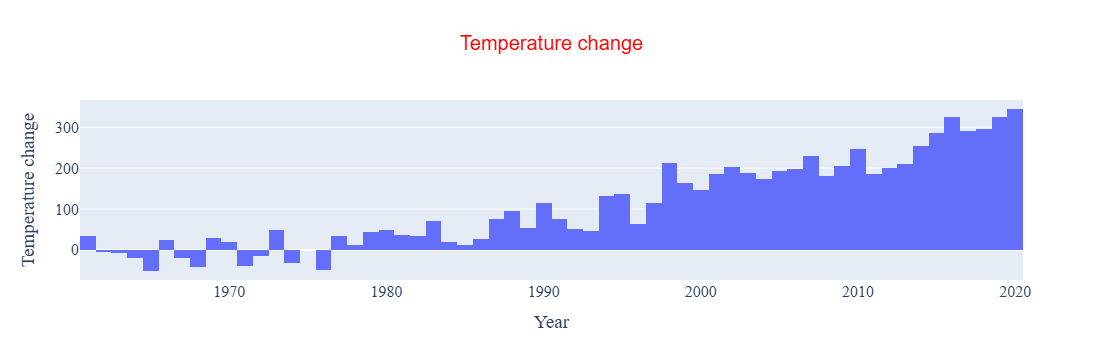

In [21]:
fig = px.histogram(MeanData, x="Year", y="Value", nbins = 60,
                  title="Temperature change")

fig.update_layout(
    # Set the global font
    font = {
        "family":"Times new Roman",
        "size":16
    },
    # Update title font
    title = {
        "text": "Temperature change",
        "y": 0.9, # Sets the y position with respect to `yref`
        "x": 0.5, # Sets the x position of title with respect to `xref`
        "xanchor":"center", # Sets the title's horizontal alignment with respect to its x position
        "yanchor": "top", # Sets the title's vertical alignment with respect to its y position. "      
        "font": { # Only configures font for title
            "family":"Arial",
            "size":20,
            "color": "red"
        }
    }
)

# Add X and Y labels
fig.update_xaxes(title_text="Year")
fig.update_yaxes(title_text="Temperature change")
fig.show()